In [52]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import pandas as pd
import math
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

#Make sure these are floating point values:                                                                                                                                                                                              
scale_x = 0.1
scale_y = 1.0
scale_z = 0.1

#Axes are scaled down to fit in scene                                                                                                                                                                                                    
max_scale=max(scale_x, scale_y, scale_z)

scale_x=scale_x/max_scale
scale_y=scale_y/max_scale
scale_z=scale_z/max_scale

#Create scaling matrix                                                                                                                                                                                                                   
scale = np.array([[scale_x,0,0,0],
                  [0,scale_y,0,0],
                  [0,0,scale_z,0],
                  [0,0,0,1]])


def get_proj_scale(self):
    """                                                                                                                                                                                                                                    
    Create the projection matrix from the current viewing position.                                                                                                                                                                        

    elev stores the elevation angle in the z plane                                                                                                                                                                                         
    azim stores the azimuth angle in the x,y plane                                                                                                                                                                                         

    dist is the distance of the eye viewing point from the object                                                                                                                                                                          
    point.                                                                                                                                                                                                                                 

    """
    relev, razim = np.pi * self.elev/180, np.pi * self.azim/180

    xmin, xmax = self.get_xlim3d()
    ymin, ymax = self.get_ylim3d()
    zmin, zmax = self.get_zlim3d()

    # transform to uniform world coordinates 0-1.0,0-1.0,0-1.0                                                                                                                                                                             
    worldM = proj3d.world_transformation(
        xmin, xmax,
        ymin, ymax,
        zmin, zmax)

    # look into the middle of the new coordinates                                                                                                                                                                                          
    R = np.array([0.5, 0.5, 0.5])

    xp = R[0] + np.cos(razim) * np.cos(relev) * self.dist
    yp = R[1] + np.sin(razim) * np.cos(relev) * self.dist
    zp = R[2] + np.sin(relev) * self.dist
    E = np.array((xp, yp, zp))

    self.eye = E
    self.vvec = R - E
    self.vvec = self.vvec / proj3d.mod(self.vvec)

    if abs(relev) > np.pi/2:
    # upside down                                                                                                                                                                                                                          
      V = np.array((0, 0, -1))
    else:
      V = np.array((0, 0, 1))
    zfront, zback = -self.dist, self.dist

    viewM = proj3d.view_transformation(E, R, V)
    perspM = proj3d.persp_transformation(zfront, zback)
    M0 = np.dot(viewM, worldM)
    M = np.dot(perspM, M0)

    return np.dot(M, scale);

Axes3D.get_proj=get_proj_scale


from smooth_func import Smooth
import os
os.chdir('/home/jiarong/research/breakingwave/breakingwave_Re10000_LEVEL13')

#### An example of an energy plot that compares different cases. Functions from energy_func.py are used.

E = KE + GPE <br>
$\zeta$ = dE/dt * 1/E

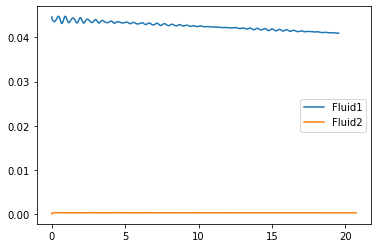

In [53]:
# Creating 2 subplots
# fig = plt.figure(figsize = (15, 5))
# ax = fig.add_subplot(121)
# List here that cases that needs to be compared and there distinct labels
filename_set = ['./budgetFluid1.dat']
energy = pd.read_table(filename_set[0], delimiter = ' ', error_bad_lines=False)
total = energy.ke 
plt.plot(energy.t, total, label = 'Fluid1')      
filename_set = ['./budgetFluid2.dat']
energy = pd.read_table(filename_set[0], delimiter = ' ', error_bad_lines=False)
total = energy.ke 
plt.plot(energy.t, total, label = 'Fluid2')  
plt.legend()
plt.show()

./Interface/results0.00_0.dat
./Interface/results2.00_0.dat
./Interface/results4.00_0.dat
./Interface/results6.00_0.dat
./Interface/results8.00_0.dat
./Interface/results10.00_0.dat
./Interface/results12.00_0.dat
./Interface/results14.00_0.dat


/home/jiarong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


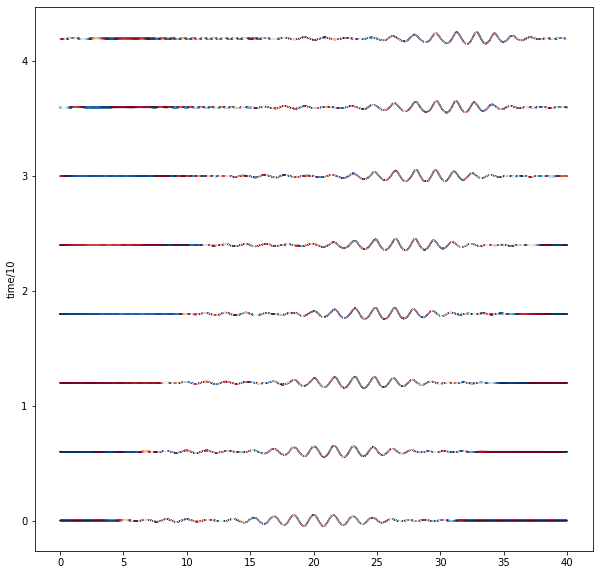

In [60]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
# ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho')
t = np.array([])
x = np.array([])
y = np.array([])

for i in range(0, 8):
    filename = './Interface/results%0.2f_%g.dat' % (i*2, 0)
    print(filename)
    interface = pd.read_table(filename, names = ['x', 'y', 'f'], delimiter = ' ')
    for j in range (0, 40):
        filename = './Interface/results%0.2f_%g.dat' % (i*2, j)
#         interface = pd.read_table(filename, names = ['x', 'y'], delimiter = ' ')
        interface_append = pd.read_table(filename, names = ['x', 'y', 'f'], delimiter = ' ')
        interface = interface.append(interface_append, ignore_index=True)
    interface = interface.sort_values(by=['x'])
    interface = interface.loc[interface.f > 1e-18]
    t = np.ones(interface.x.size)*(i*6)/10
#     x = np.append(x, list(interface.x))
#     y = np.append(y, list(interface.y))
# print(x)
#     ax.view_init(elev = 10, azim = 280)
    lines = ax.scatter(interface.x, interface.y+t, c = interface.f, cmap = 'RdBu', s = 0.1)
    ax.set_ylabel('time/10')
#     xi = np.linspace(i, i, num=100)
#     yi = np.linspace(-0.5, 0.5, num=100)
fig.show()

/home/jiarong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


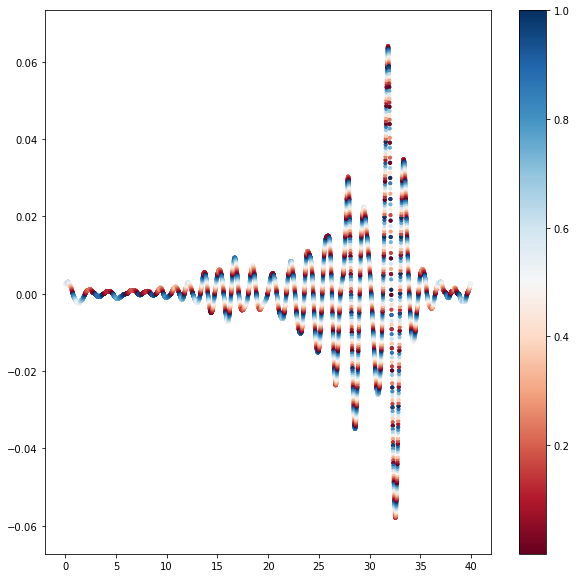

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
# ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho')
t = np.array([])
x = np.array([])
y = np.array([])

filename = './Interface/results60.01_0.dat' 
interface = pd.read_table(filename, names = ['x', 'y', 'f'], delimiter = ' ')
for j in range (1, 40):
    filename = './Interface/results60.01_%g.dat' %  j
#         interface = pd.read_table(filename, names = ['x', 'y'], delimiter = ' ')
    interface_append = pd.read_table(filename, names = ['x', 'y', 'f'], delimiter = ' ')
    interface = interface.append(interface_append, ignore_index=True)
interface = interface.sort_values(by=['x'])
interface = interface.loc[interface.f > 1e-4]
#     x = np.append(x, list(interface.x))
#     y = np.append(y, list(interface.y))
# print(x)
#     ax.view_init(elev = 10, azim = 280)
lines = ax.scatter(interface.x, interface.y, c = interface.f, cmap = 'RdBu', s = 10)
# ax.set_ylabel('time/10')
#     xi = np.linspace(i, i, num=100)
#     yi = np.linspace(-0.5, 0.5, num=100)
fig.colorbar(lines)
fig.show()

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

#Make sure these are floating point values:                                                                                                                                                                                              
scale_x = 1.0
scale_y = 2.0
scale_z = 3.0

#Axes are scaled down to fit in scene                                                                                                                                                                                                    
max_scale=max(scale_x, scale_y, scale_z)

scale_x=scale_x/max_scale
scale_y=scale_y/max_scale
scale_z=scale_z/max_scale

#Create scaling matrix                                                                                                                                                                                                                   
scale = np.array([[scale_x,0,0,0],
                  [0,scale_y,0,0],
                  [0,0,scale_z,0],
                  [0,0,0,1]])
print scale

def get_proj_scale(self):
    """                                                                                                                                                                                                                                    
    Create the projection matrix from the current viewing position.                                                                                                                                                                        

    elev stores the elevation angle in the z plane                                                                                                                                                                                         
    azim stores the azimuth angle in the x,y plane                                                                                                                                                                                         

    dist is the distance of the eye viewing point from the object                                                                                                                                                                          
    point.                                                                                                                                                                                                                                 

    """
    relev, razim = np.pi * self.elev/180, np.pi * self.azim/180

    xmin, xmax = self.get_xlim3d()
    ymin, ymax = self.get_ylim3d()
    zmin, zmax = self.get_zlim3d()

    # transform to uniform world coordinates 0-1.0,0-1.0,0-1.0                                                                                                                                                                             
    worldM = proj3d.world_transformation(
        xmin, xmax,
        ymin, ymax,
        zmin, zmax)

    # look into the middle of the new coordinates                                                                                                                                                                                          
    R = np.array([0.5, 0.5, 0.5])

    xp = R[0] + np.cos(razim) * np.cos(relev) * self.dist
    yp = R[1] + np.sin(razim) * np.cos(relev) * self.dist
    zp = R[2] + np.sin(relev) * self.dist
    E = np.array((xp, yp, zp))

    self.eye = E
    self.vvec = R - E
    self.vvec = self.vvec / proj3d.mod(self.vvec)

    if abs(relev) > np.pi/2:
    # upside down                                                                                                                                                                                                                          
      V = np.array((0, 0, -1))
    else:
      V = np.array((0, 0, 1))
    zfront, zback = -self.dist, self.dist

    viewM = proj3d.view_transformation(E, R, V)
    perspM = proj3d.persp_transformation(zfront, zback)
    M0 = np.dot(viewM, worldM)
    M = np.dot(perspM, M0)

    return np.dot(M, scale);

Axes3D.get_proj=get_proj_scale

"""
You need to include all the code above.
From here on you should be able to plot as usual.
"""

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()